<a href="https://colab.research.google.com/github/silvigeorge23/Cookie_Cats_mobile_game/blob/main/Cookie_Cats_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is A/B testing?

A/B testing, or Split testing, compares two versions or options of an app/ webpage to identify the better performer. This method is based on real data than guesses by comparing the options to learn what customers prefer.
A/B testing refers to a randomised experimentation process where two or more versions of a variable are shown to different segments of website visitors at the same time tod etermine which version leaves the maximum impact and drives business metrics.

#The math behind A/B testing

 - Hypothesis testing with null and alternative hypotheses
 - Statistical significance using p-values and alpha error
 - Confidence intervals to quantify uncertainty
 - Statistical power analysis to detect effect sizes
 - Data sampling and distributions like normal, binomial

#Cookie Cats Context

Cookie Cats is an mobile puzzle game featuring a 'connect three' style strategy....and singing cats.
As players progress through the levels of the gme, they will occasionally encounter gates that force them to wait before they can progress or pay to progress. The idea behind this is to encourage in-app purchases and give players an enforced break from the game, hopefully resulting in an increased and prolonged enjoyment of the game.

The aim of the task is to decide where to place these gates. The first gate was placed at level 30. We are going to analyse an AB test to look at the impact on player retention.

#Data Dictionary

There are 90189 entries. Column names are as follows:

 - User ID: unique nunmber to identify each player
 - Version: identify which control group the player is in: gate_30 or gate_40
 - Sum_gamerounds: number of game rounds the player played during the first 14 days after install
 - Retention_1: Did the player come back and play 1 day after installing? (True/False)
 - Retention_7: Did the player come back and play 7 days after installing? (True/False

#Task 1: Prerequisites

Task 1: Set up the environment (although only pandas is required)
 - Import Pandas
 - Read in the data file

In [22]:
import pandas as pd
import numpy as np
import matplotlib

In [23]:
df = pd.read_csv("cookie_cats.csv")

#Task 2: The AB-test data

 When a player installed the game, they were randomly assigned to either gate_30 or gate_40. Check if the quantity of players in each variable are roughly the same.

In [24]:
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

Roughly the same, and adds to 90,189 entries!

#Task 3:The distribution of game rounds

Plot the distribution of the number of game rounds players played during the first week of playing the game.

In [25]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()

Text(0.5, 0, 'Game rounds')

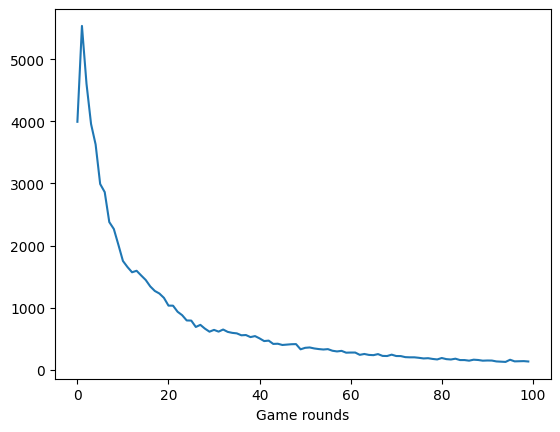

In [26]:
ax = plot_df.head(n=100).plot(x = "sum_gamerounds",y="userid")
ax.set_xlabel("Game rounds")

Looks like there was a very steep decrease after 10 rounds. But you can also see, that some players install the game and never play it (4000 at 0 game rounds)

#Task 4: Overall 1-day retention

A common metric in the video gaming industry is the '1 day retention' i.e. the percentage of players that come back to play the game one day after installing it. The higher the 1-day retention is, the easier it is to retain players and build a large player base.

1. Divide sum of retention_1 by count of retention_1
2. Multiply by 100 to get percentage value
3. Round to 2.dp
4. Print in percentage format

In [27]:
number = ((df['retention_1'].sum()/df['retention_1'].count())* 100).round (2)
number = number.astype(str) + '%'
print(number)

44.52%


Result: Less than half of the participants came back one day after installing the game.

#Task 5: 1 day retention by AB group

Now we have a bench mark, lets look at how 1-day retention differs between the two AB-groups.
Calculate 1-day retention for each AB group:
 - Copy and paste solution from Task 4
 - Modify the code to add .groupby('version)

In [28]:
df.groupby('version').sum()/df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


The table shows there is a slight decrease when the gate was moved from gate_30 to gate_40. Even small changes can have big impacts in retention. But how certain can we be that gate_40 will be a worse choice, in the future?

#Task 6: Should we be confident in the difference?

To get the certainty of these retention values, we can use the bootstrapping method; by repeatedly re-sampling our dataset (With replacement) and calculate the 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are. To do so

1. Perform 500 bootstrap replications of 1-day retention and plot the result. Each replication should re-sample from df and calculate the mean retention for each AB group defined by version.
2. Turn the list into a dataframe
3. Plot it using KDE (Kernel Density Estimate)

In [29]:
#Create a list with bootstrapped means for each AB group
boot_1d = []
iterations = 500
for i in range(iterations):
  boot_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
  boot_1d.append(boot_mean)


In [30]:
#Transform the list into a DataFram
boot_1d = pd.DataFrame(boot_1d)

Text(0.5, 0, 'Mean of 1-day Retention')

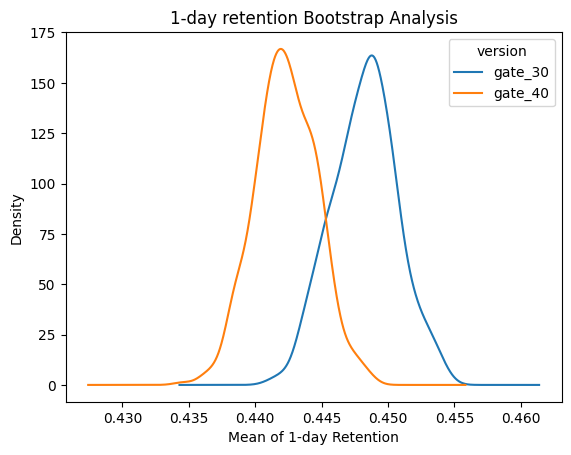

In [31]:
#Create a Kernel Density Estimate plot of the bootstrap distributions
ax = boot_1d.plot.kde()
ax.set_title('1-day retention Bootstrap Analysis')
ax.set_xlabel('Mean of 1-day Retention')

We can see there seems to be a small difference between the two groups. Lets zoom in on this 1-day retention difference.

#Task 7: Zooming in on the difference

Calculate and plot the % difference in 1-day retention between the two AB- groups
1. Calculate the bootstrap % difference in 1-day retention by:
  Calculating the difference between gate_30 and gate_40, dividing by gate_40, and multiplying by 100
2. Plot as KDE

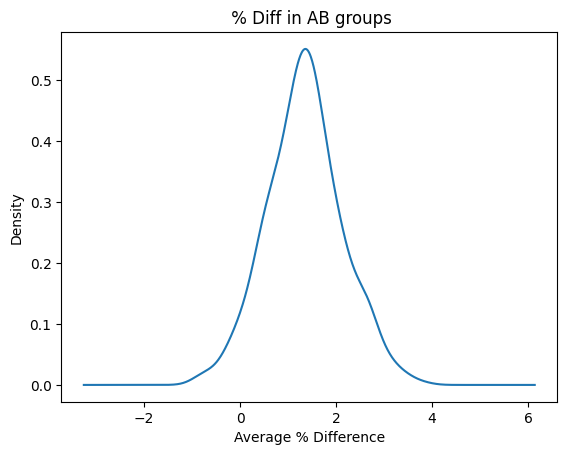

In [32]:
#Add a column with % difference between the two AB groups
boot_1d['diff'] = ((boot_1d.gate_30 - boot_1d.gate_40)/ boot_1d.gate_40 * 100)

#Plot the bootstrap % difference
ax = boot_1d['diff'].plot.kde()
ax.set_xlabel('Average % Difference')
ax.set_title(' % Diff in AB groups');

The % difference is around 1-2%. Most of the distribution is above 0% in favour of gate_30.

#Task 8 : The probability of a difference

What is the probability that the difference is above 0%?. Calculate the probability that gate_30 will give a higher 1 day retention

1. Claculate the proportion of boot_1d that is above 0.0
2. Pretty print as a percentage

In [33]:
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])
'{0:.1%}'.format(prob)

'95.4%'

There is a high probability that 1-day retention is better when gate is at level 30. But since players have only been playing the game for one day, they probably haven't reached level 30 yet, so they're not affected by the gate yet.

#Task 9:  7-day retention by AB group

After a week, more players will have reached gate_40, so let's take alook at the 7 day retetion

Calculate the 7 day retention for the two AB groups (similar code to Task 5).

In [34]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

7-day retention is slightly lower at gate_40 than gate_30.

#Task 10: Bootstrapping the difference again

Use bootstrap analysis to figure out how certain we should be of the difference between the AB groups

In [35]:
#Creating a list with bootstrapped means for each AB-group
boot_7d = []
iterations = 500
for i in range(iterations):
  boot_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
  boot_7d.append(boot_mean)

In [36]:
  #Transform the list to a DataFrame
  boot_7d = pd.DataFrame(boot_7d)

In [37]:
#Adding a column with the % difference between the two AB groups
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) /
                   boot_7d['gate_40'] * 100)

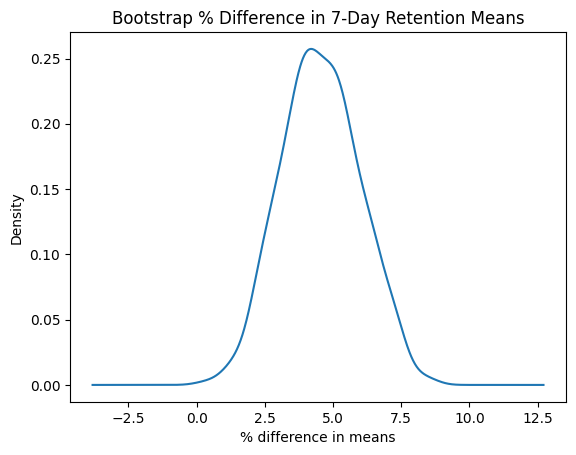

In [38]:
#Plotting the bootstrap % difference
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")
ax.set_title('Bootstrap % Difference in 7-Day Retention Means');

In [46]:
#Calculating the probability that 7-day retention is greater at gate_30
prob = (boot_7d['diff'] > 0).mean()

In [47]:
#Pretty printing the probability
'{0:.1%}'.format(prob)

'100.0%'

#Task 11: Conclusion

Should we move the gate to level 40 or keep it at 30?

Boot strap result tells us there is strong evidence that 7 day retention is higher with gate_30 than gate_40. If we want to keep retention high at day 1 and 7, we should not move the gate to level 40.

Other metrics to look at include
 - number of game rounds
 - how much in game purchases are made by the two AB groups

 Final task: Set the move to level 40 at True or False to indicate your decision

In [52]:
move_to_level_40 = False